<class 'numpy.ndarray'>  of size:  2712585
The skip_header=1 means that we have only the data

first line:
 [2015    1    0 5100  614] 
last line
 [1992   99   93 5100    1]
[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


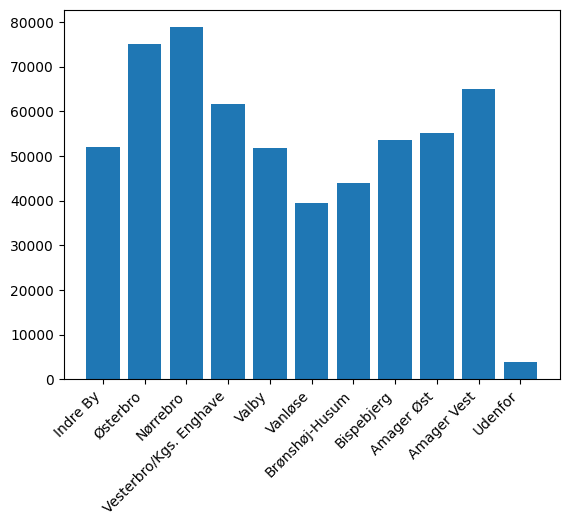

{'Udenfor': 3872, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Valby': 51727, 'Indre By': 51937, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Vesterbro/Kgs. Enghave': 61623, 'Amager Vest': 64967, 'Østerbro': 75113, 'Nørrebro': 78802}


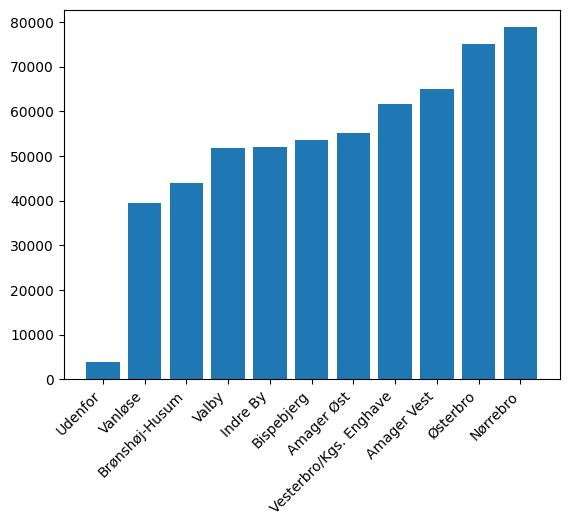

[7358 8959 5429 4338 5753 5014 5825 5279 5416 6428   60]
59859
[360 472 630 447 288 164 370 438 234 368  16]
3787


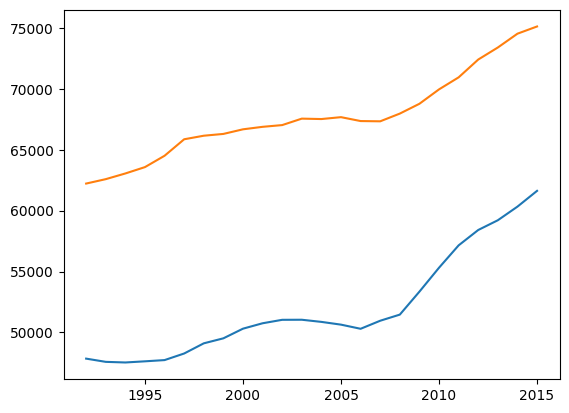

In [20]:
import numpy as np
import matplotlib.pyplot as plt
#1
filename = './befkbhalderstatkode.csv'
#2
bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dd = bef_stats_df
print(type(bef_stats_df), ' of size: ', bef_stats_df.size)
print('The skip_header=1 means that we have only the data\n\nfirst line:\n',bef_stats_df[0],'\nlast line\n',bef_stats_df[len(bef_stats_df)-1])
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

def number_of_people_per_neighbourhood(n,mask):
    all_people_in_given_n = dd[mask & (dd[:,1]==n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

peopleIn2015 = (dd[:,0]==2015)
all_people = np.array([number_of_people_per_neighbourhood(n, peopleIn2015) for n in neighb.keys()])
print(all_people)

#3
plt.bar(neighb.values(),all_people)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.plot()
plt.show()

#4
dictionary = dict(zip(neighb.values(),all_people))

sortedRes = dict(sorted(dictionary.items(), key=lambda x: x[1]))
print(sortedRes)

plt.bar(sortedRes.keys(), sortedRes.values())
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.plot()
plt.show()

#5
over65Mask = (dd[:,0]==2015) & (dd[:,2]>=65)
peopleOver65 = np.array([number_of_people_per_neighbourhood(n, over65Mask) for n in neighb.keys()])
print(peopleOver65)
print(peopleOver65.sum())

#6
notDanes = (dd[:,0]==2015) & (dd[:,3]!=5100) & (dd[:,2] >= 65)
peopleNotDanes = np.array([number_of_people_per_neighbourhood(n, notDanes) for n in neighb.keys()])
print(peopleNotDanes)
print(peopleNotDanes.sum())

#7
def number_of_people_per_neighbourhood_and_year(n,year):
    all_people_in_given_n = dd[(dd[:,0]==year) & (dd[:,1]==n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

years = np.arange(1992,2016)
vesterbro = np.array([number_of_people_per_neighbourhood_and_year(4,year) for year in years])
oesterbro = np.array([number_of_people_per_neighbourhood_and_year(2,year) for year in years])

plt.plot(years,vesterbro)
plt.plot(years,oesterbro)
plt.show()